In [28]:
from sklearn.datasets import load_breast_cancer
import numpy as np

In [29]:
cancer = load_breast_cancer()
cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
np.bincount(cancer.target)
np.unique(cancer.target)

array([0, 1])

---
### k-nn 알고리즘 적용시켜서 예측해보기
- k가 낮을 수록 모델이 복잡해지고 일반화 되지 못하고(과대적합) <br><br>
- k가 높을 수록 모델은 단순해지고 예측력이 떨어진다(과소적합)를 증명해보자 <br><br>


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

In [32]:
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [33]:
# train data test data 나누기
X_train , X_test , y_train , y_test = \
    train_test_split(cancer.data, cancer.target , stratify=cancer.target , random_state= 66)

In [34]:
training_accuracy = []
test_accuracy = []

# 1에서 10까지 k 설정
neighbors_settings = range(1,11)

In [35]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))



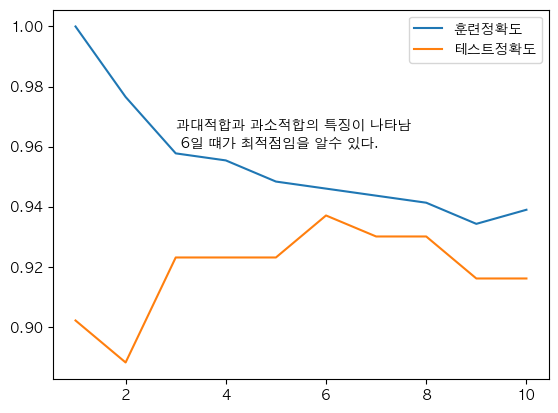

In [40]:
plt.plot(
    neighbors_settings,
    training_accuracy,
    label= '훈련정확도'
)

plt.plot(
    neighbors_settings,
    test_accuracy,
    label = '테스트정확도'
)

plt.text(
    x=3,
    y=0.96,
    s = '과대적합과 과소적합의 특징이 나타남 \n 6일 떄가 최적점임을 알수 있다. '
)

plt.legend()

plt.show()